# Trabajo de aplicacion 3

# Clara Isabel Botero Perez 

# Miguel Angel Jimenez Avendaño

In [307]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [309]:
#punto 1: base de datos
#codigo para la implementacion de esta directamente sacado de la pagina dada
# esta base de datos es un estudio de los casos de hepatitis c en pacientes
from ucimlrepo import fetch_ucirepo  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats
  
# fetch dataset 
hepatitis_c_virus_hcv_for_egyptian_patients = fetch_ucirepo(id=503) 
  
# data (as pandas dataframes) 
X = hepatitis_c_virus_hcv_for_egyptian_patients.data.features 
y = hepatitis_c_virus_hcv_for_egyptian_patients.data.targets 
  
# metadata 
print(hepatitis_c_virus_hcv_for_egyptian_patients.metadata) 
  
# variable information 
print(hepatitis_c_virus_hcv_for_egyptian_patients.variables) 

%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')



{'uci_id': 503, 'name': 'Hepatitis C Virus (HCV) for Egyptian patients', 'repository_url': 'https://archive.ics.uci.edu/dataset/503/hepatitis+c+virus+hcv+for+egyptian+patients', 'data_url': 'https://archive.ics.uci.edu/static/public/503/data.csv', 'abstract': 'Egyptian patients who underwent treatment dosages for HCV about 18 months. Discretization should be applied based on expert recommendations; there is an attached file shows how.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1385, 'num_features': 28, 'feature_types': ['Real'], 'demographics': ['Age', 'Gender'], 'target_col': ['Baselinehistological staging'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2017, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': '10.24432/C5989V', 'creators': ['Sanaa Kamal', 'Mohamed ElEleimy', 'Doaa Hegazy', 'Mahmoud Nasr'], 'intro_paper': {'ID': 232, 'type': 'NATIVE', 'ti

# configuracion de datos

Datos corregidos:
   Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0    56       0   35      2               1          1          1   
1    46       0   29      1               2          2          1   
2    57       0   33      2               2          2          2   
3    49       1   33      1               2          1          2   
4    59       0   32      1               1          2          1   

   Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  ALT 36  \
0                                 2          2                 2  ...       5   
1                                 2          2                 1  ...      57   
2                                 1          1                 1  ...       5   
3                                 1          2                 1  ...      48   
4                                 2          2                 2  ...      94   

   ALT 48  ALT after 24 w  RNA Base   RNA 4   RNA 12  RNA EOT  RNA EF  \
0      

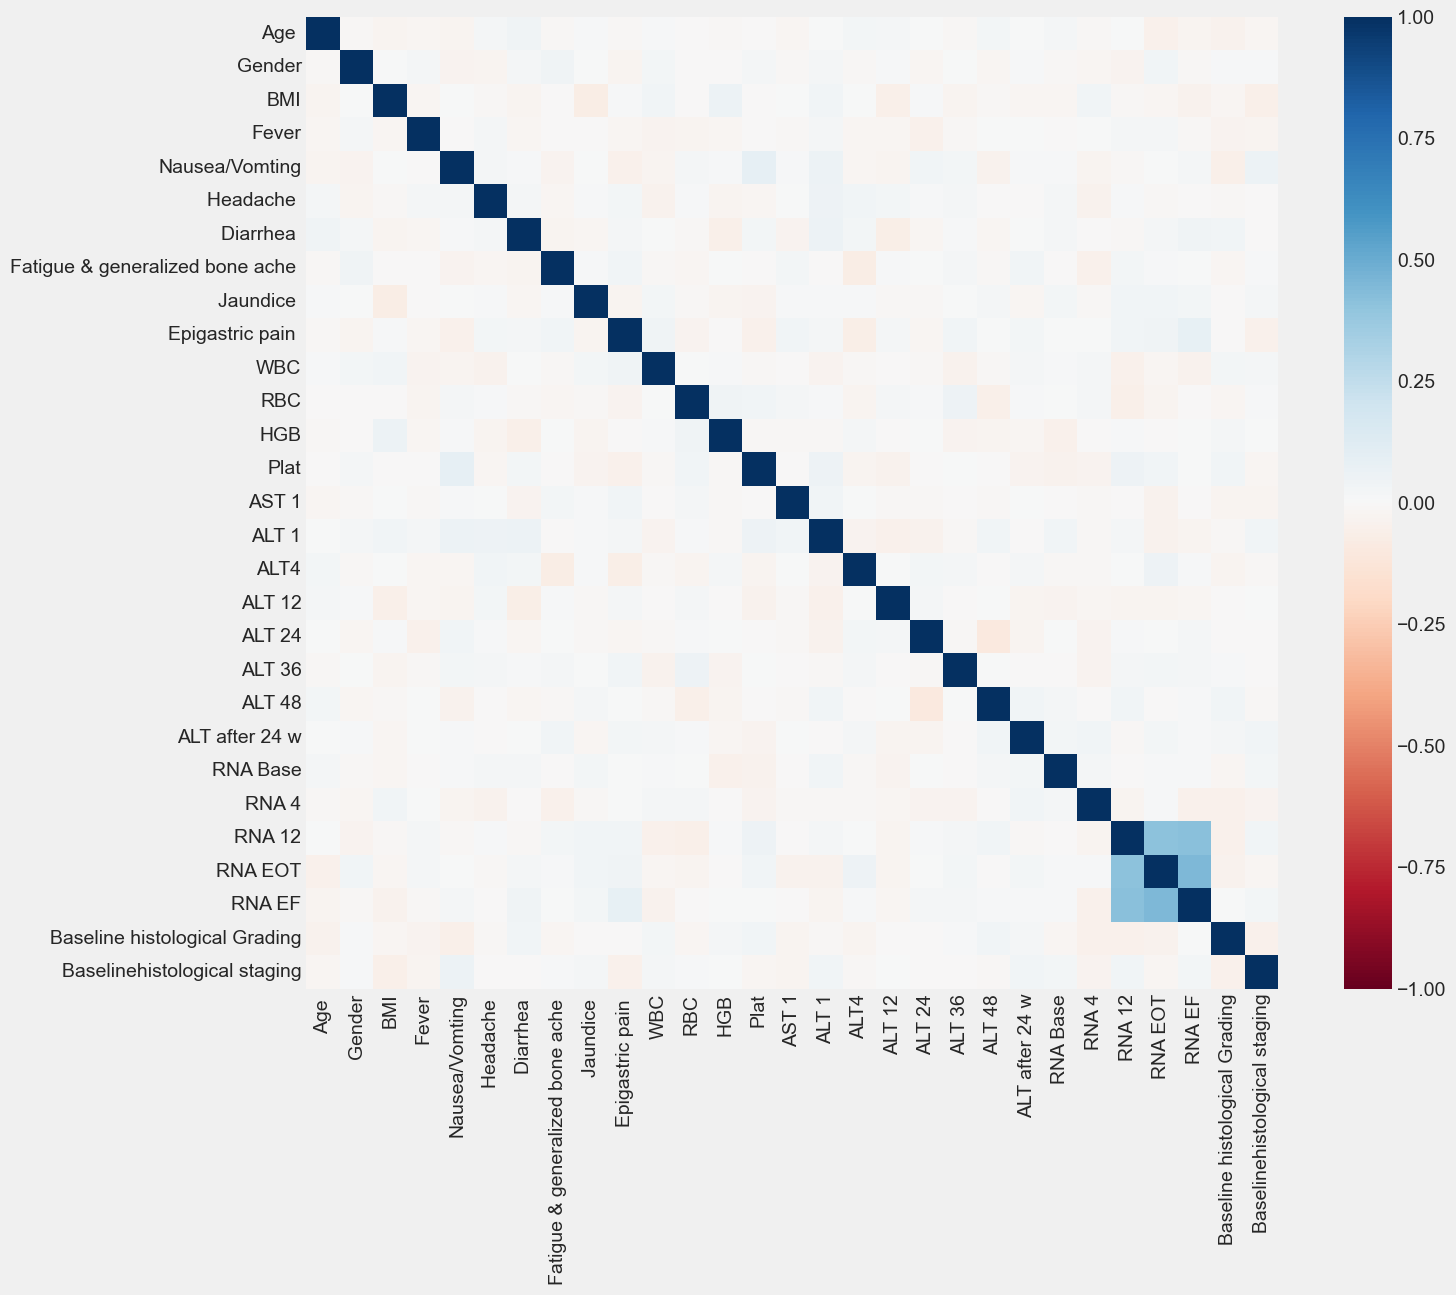

In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Cargar datos
hepatitis_c_virus_hcv_for_egyptian_patients = fetch_ucirepo(id=503)
X = hepatitis_c_virus_hcv_for_egyptian_patients.data.features
y = hepatitis_c_virus_hcv_for_egyptian_patients.data.targets

# Agrupar en un DataFrame
df = pd.concat([X, y], axis=1)

# Convertir a enteros las columnas específicas
df['RBC'] = df['RBC'].astype(int)
df['Plat'] = df['Plat'].astype(int)
df['ALT4'] = df['ALT4'].astype(int)

# Convertir 'Gender' a valores numéricos
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Verificación de datos
print("Datos corregidos:")
print(df.head())
print(df.describe())
print(df.info())

# Mapa de calor de correlaciones
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, cmap='RdBu')
plt.show()

# Selección de características y target
X = df[['Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ', 'Diarrhea ', 
        'Fatigue & generalized bone ache ', 'Jaundice ', 'Epigastric pain ', 
        'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 
        'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base', 'RNA 4', 
        'RNA 12', 'RNA EOT', 'RNA EF', 'Baseline histological Grading']]
y = df['Age ']

# Estandarización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# regresion robusta

In [337]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import GridSearchCV

# Crear el modelo base
#robust_regressor = HuberRegressor()

# Definir el espacio de hiperparámetros para la búsqueda
#param_grid = {
 #   'epsilon': [1.1, 1.35, 1.5, 1.75, 2.0],  # Parámetro de sensibilidad a los outliers
  #  'alpha': [0.0001, 0.001, 0.01, 0.1],     # Regularización L2
   # 'max_iter': [100, 500, 1000]             # Iteraciones máximas
#}

# Configurar GridSearchCV
#grid_search = GridSearchCV(
 #   estimator=robust_regressor,
  #  param_grid=param_grid,
   # scoring='neg_mean_squared_error',  # Métrica de evaluación
    #cv=5,  # Validación cruzada con 5 particiones
#    verbose=2,  # Mostrar progreso
#    n_jobs=-1  # Usar todos los núcleos disponibles
#)

# Ajustar el modelo con los datos
grid_search.fit(X_scaled, y)

# Mostrar resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación (MSE negativo):", grid_search.best_score_)

# Funciones de evaluación
def cross_val(model):
    pred = cross_val_score(model, X_scaled, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print(f'MAE: {mae:0.2f}')
    print(f'MSE: {mse:0.2f}')
    print(f'RMSE:: {rmse:0.2f}')
    print(f'R2 Square: {r2_square:0.2f}')
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Modelo de regresión robusta (RANSAC)
{'alpha': 0.0001, 'epsilon': 2.0, 'max_iter': 100}
model = RANSACRegressor(max_trials=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# Evaluación del modelo
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# Resultados
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred), cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
print(results_df_2)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mejores hiperparámetros: {'alpha': 0.1, 'epsilon': 2.0, 'max_iter': 100}
Mejor puntuación (MSE negativo): -13981.56603147185
Test set evaluation:
_____________________________________
MAE: 15.04
MSE: 343.61
RMSE:: 18.54
R2 Square: -3.35
__________________________________
Train set evaluation:
_____________________________________
MAE: 13.74
MSE: 300.14
RMSE:: 17.32
R2 Square: -2.94
__________________________________
               Model        MAE         MSE       RMSE  R2 Square  \
0  Robust Regression  15.041068  343.614348  18.536838  -3.353534   

   Cross Validation  
0          -2.88656  


[learning_curve] Training set sizes: [ 40  80 120 160 200 240 280 320 360 400]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


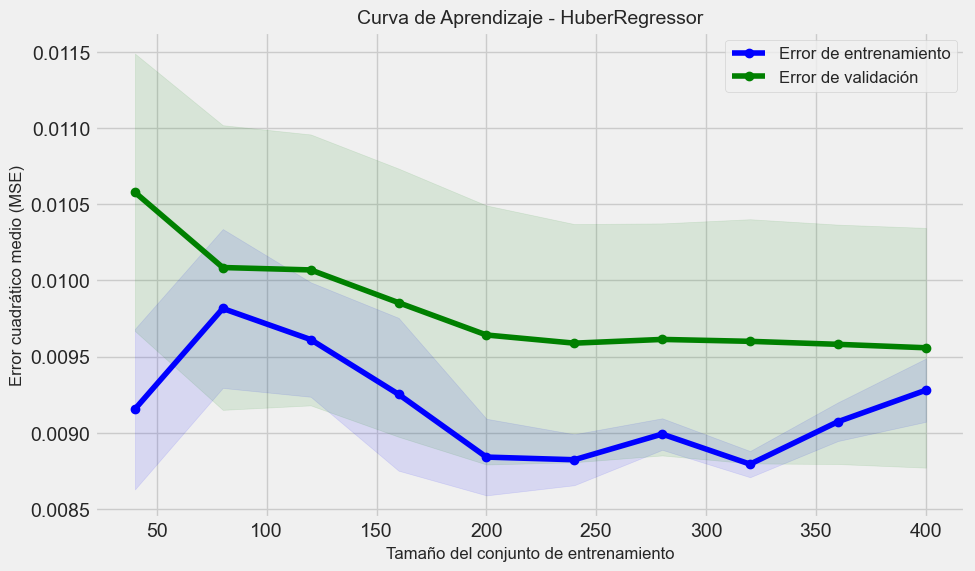

In [375]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import learning_curve

# Crear el modelo de regresión robusta
robust_regressor = HuberRegressor(alpha=0.01, epsilon=1.35, max_iter=1000)

# Obtener los datos para la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    estimator=robust_regressor,
    X=X_scaled,          # Conjunto de datos escalados (sin outliers extremos)
    y=y,                 # Variable objetivo
    cv=5,                # Validación cruzada con 5 particiones
    scoring='neg_mean_squared_error',  # Métrica: error cuadrático medio negativo
    n_jobs=-1,           # Usar todos los núcleos disponibles
    train_sizes=np.linspace(0.1, 1.0, 10),  # Porcentaje del conjunto de entrenamiento
    verbose=1            # Mostrar progreso
)

# Promedio y desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_mean, 'o-', color='blue', label='Error de entrenamiento')
plt.plot(train_sizes, -test_mean, 'o-', color='green', label='Error de validación')

# Rellenar áreas de desviación estándar
plt.fill_between(train_sizes, -train_mean - train_std, -train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, -test_mean - test_std, -test_mean + test_std, alpha=0.1, color='green')

# Configuración del gráfico
plt.title("Curva de Aprendizaje - HuberRegressor", fontsize=14)
plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=12)
plt.ylabel("Error cuadrático medio (MSE)", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.show()
